# Proyecto Final:

## 1. Abstracto con motivación y audiencia
Descripción de alto nivel de lo que motiva a analizar los datos elegidos y que audiencia se podrá beneficiar de este análisis.

### Motivación:
La compra y venta de propiedades es un proceso complejo influenciado por múltiples factores como ubicación, tamaño, antigüedad, entre otros. Sin embargo, tanto compradores como vendedores suelen enfrentarse a la incertidumbre de si el precio de una propiedad es justo o competitivo en el mercado. Este proyecto busca resolver esta problemática al identificar las variables que más impactan en la valorización y devaluación de los inmuebles, proporcionando herramientas analíticas que permitan una toma de decisiones más informada.

### Audiencia:
El proyecto está dirigido a:
1. Compradores de propiedades: interesados en determinar si el precio de una vivienda está dentro de un rango justo basado en sus características.
2. Vendedores de inmuebles: que buscan fijar precios competitivos y realistas para maximizar sus ingresos sin perder oportunidades en el mercado.
3. Agentes inmobiliarios y analistas del sector: quienes podrán integrar los resultados en su análisis de mercado para ofrecer mejores servicios a sus clientes.

### Objetivo:
Utilizando un conjunto de datos que incluye información sobre propiedades vendidas, fechas, precios y características, este proyecto pretende responder a tres preguntas clave:
1. ¿Cuáles son las variables que más impactan en el precio de una propiedad?
2. ¿Qué factores contribuyen más a la devaluación de una propiedad?
3. ¿Qué características valorizan más un inmueble?

Mediante el uso de Python y técnicas de análisis de datos, se desarrollará un modelo interpretativo que no solo resalte los factores más relevantes, sino que también proporcione insights prácticos y fáciles de entender para la audiencia objetivo.

Este enfoque tiene el potencial de transformar la manera en que se toman decisiones en el sector inmobiliario, mejorando la transparencia y eficiencia del mercado.

## 2. Resumen de metadata
Resumen de los datos a ser analizados es decir, número de filas/columnas, tipos de variables, etc.

En total hay 21 columnas el los datos, las cuáles se describen a continuación:

1. ID: Correlativo númerico que distingue cada una de las casas vendidas.
2. Date: Fecha en la cual fue vendida la casa.
3. Price: Precio de venta de la casa (en dólares norteamericanos).
4. Bedrooms: Número de cuartos en la casa.
5. Bathrooms: Número de baños disponibles en la casa, donde un valor de 0.5 representa un baño con inodoro pero sin ducha.
6. Sqft_living: Número de pies cuadrados del espacio habitable de la casa.
7. Sqft_lot: Pies cuadrados del espacio total del terreno donde se ubica la casa.
8. Floors: Cantidad de pisos en la casa.
9. Waterfront: Variable que indica la presencia o no de vista al mar en la casa.
10. View: Índice del 0 al 4 que indica que tan buena es la vista de la propiedad.
11. Condition: Índice del 1 al 5 para calificar la condición actual de la casa.
12. Grade: Índice del 1 al 13, el cuál califica el nivel de calidad de construcción de la casa.
13. Sqft_above: Cantidad de pies cuadrados del espacio interior de la casa. que está sobre el nivel del suelo.
14. Sqft_basement: Los pies cuadrados del espacio interior de la casa. que está por debajo del nivel del suelo.
15. Yr_built: El año en fue construida la casa.
16. Yr_renovated: Año de la última renovación de la casa.
17. Zipcode: Código postal del areá donde se encuentra la casa.
18. Lat: Latitud de la ubicación de la casa.
19. Long: Longitud de la ubicación de la casa.
20. Sqft_living15: Los pies cuadrados de espacio habitable de la casa interior para los 15 vecinos más cercanos.
21. Sqft_lot15: Los metros cuadrados de los terrenos de los 15 vecinos más cercanos.

## 3. Preguntas hipótesis o Problema que queremos responder
Lista de preguntas que se busca responder mediante el análisis de datos.

1. ¿Cuáles son las variables que impactan más el precio de una propiedad?
2. ¿Qué variables devalúan más una propiedad?
3. ¿Qué variables aprecian más una propiedad?

## 4. Visualizaciones ejecutivas que responden nuestras preguntas
Utilización de gráficos que responden las preguntas de interés de nuestro proyecto.

### 1. Importar librerías y cargar Dataset

In [4]:
#Importar librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime

# Leer el archivo CSV
df = pd.read_csv(r'C:\Users\HLOPEZS\Desktop\DataScience II - MachineLearningParaLaCienciaDeDatos-main/kc_house_data.csv', encoding='latin1')

# Mostrar las primeras filas del DataFrame
print(df.head())


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

### 2. Análisis Exploratorio de Datos (EDA)

#### 2.1 Inspección Inicial

In [6]:
# Mostrar las primeras filas del dataset
print(df.head())

# Resumen de las estadísticas descriptivas
print(df.describe())

# Información del dataset
print(df.info())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [7]:
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


#### 2.2 Visualización de Datos

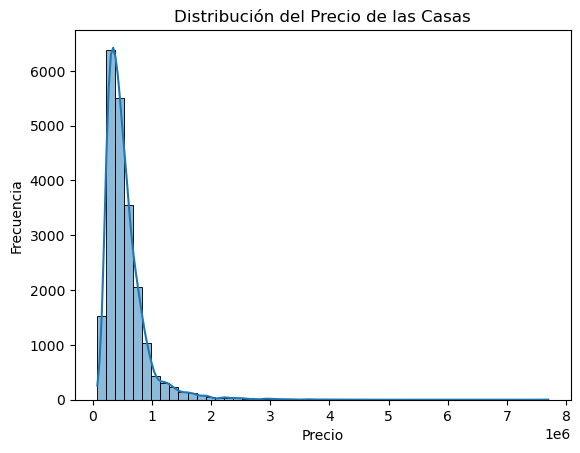

In [8]:
# Distribución del precio de las casas
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribución del Precio de las Casas')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

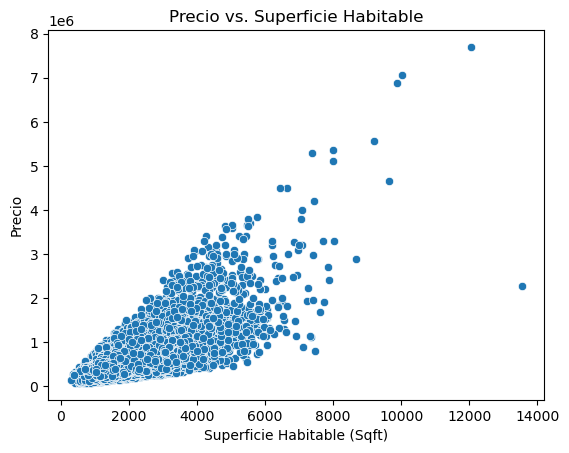

In [9]:
# Relación entre el precio y la superficie habitable
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Precio vs. Superficie Habitable')
plt.xlabel('Superficie Habitable (Sqft)')
plt.ylabel('Precio')
plt.show()


In [13]:
# Identificar las columnas no numéricas
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Columnas no numéricas:", non_numeric_columns)

Columnas no numéricas: Index(['date'], dtype='object')


In [21]:
# Convertir la columna 'fecha' al formato datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S', errors='coerce')

# Verificar los cambios
print(df['date'].head())


0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]


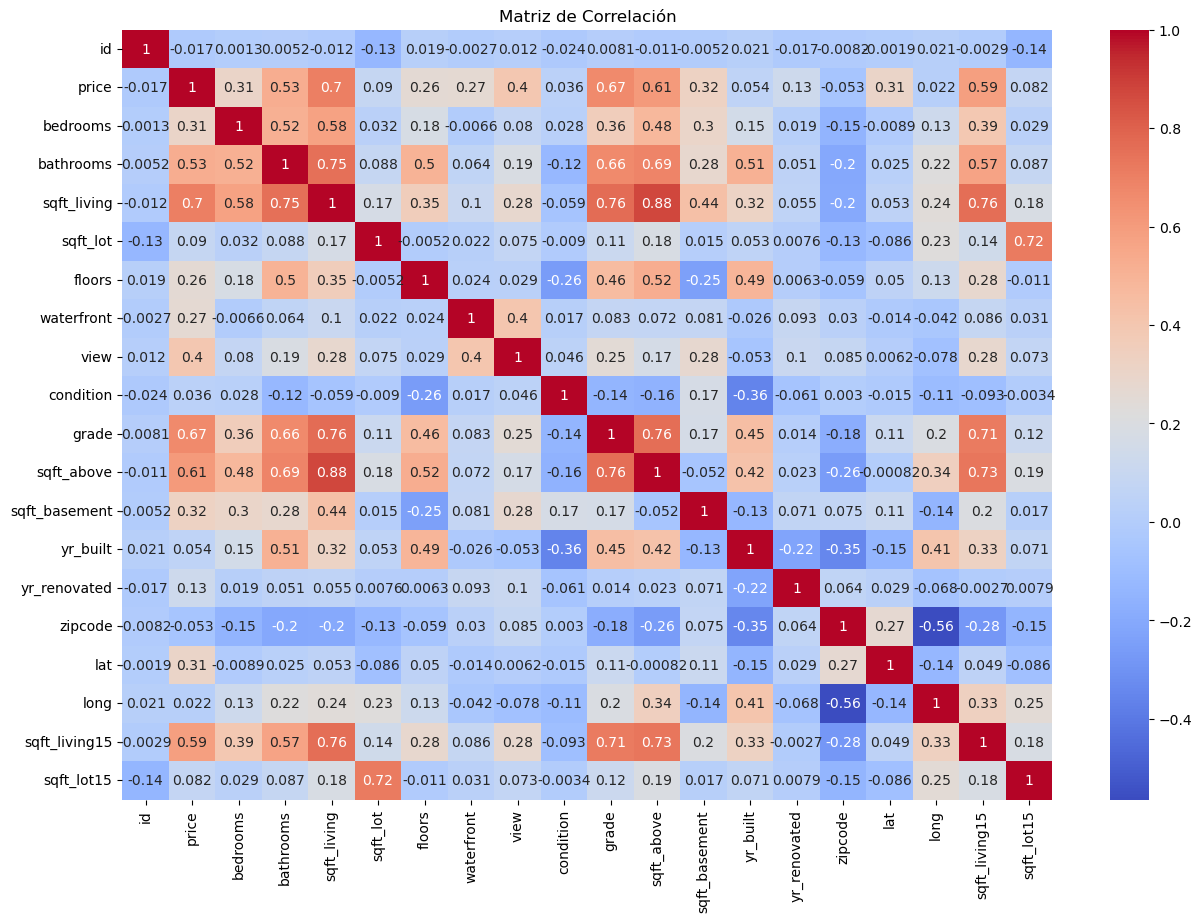

In [23]:
"""
# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Matriz de correlación
corr_matrix = df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()
"""

# Eliminar la columna 'date' (o cualquier columna no deseada)
df_sin_fecha = df.drop(columns=['date'])  # Reemplaza 'date' con el nombre exacto de la columna

# Calcular la matriz de correlación
corr_matrix = df_sin_fecha.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


Cada celda en el mapa de calor representa la correlación entre dos variables:

1. Colores cálidos (rojos) indican correlaciones positivas. 
2. Colores fríos (azules) indican correlaciones negativas. 
3. La intensidad del color refleja la magnitud de la correlación.

### 3. Preprocesamiento de Datos
Limpieza y preparación de los datos para el modelado.

#### 3.1 Manejo de Valores Nulos

In [25]:
# Verificar valores nulos
print(df.isnull().sum())

# Reemplazar valores nulos en 'yr_renovated' con 0 (si no ha sido renovada)
df['yr_renovated'] = df['yr_renovated'].fillna(0)

# Si hay valores nulos en otras columnas, decidir cómo manejarlos (por ejemplo, eliminación o imputación)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


#### 3.2 Codificación de Variables Categóricas
Si tenemos variables categóricas, convertiremos en variables numéricas.

In [26]:
# La variable 'Waterfront' es binaria, así que no necesita codificación adicional

#### 3.3 Feature Engineering
Crear nuevas características si es necesario.

In [27]:
# Limpiar los nombres de las columnas
df.columns = df.columns.str.strip()  # Eliminar espacios en blanco
df.columns = df.columns.str.lower()  # Convertir a minúsculas

# Convertir la fecha en formato datetime
df['date'] = pd.to_datetime(df['date'])

# Extraer el año de la fecha
df['year'] = df['date'].dt.year

# Edad de la casa
df['age'] = datetime.datetime.now().year - df['yr_built']

# Edad desde la última renovación
df['age_renovated'] = np.where(df['yr_renovated'] == 0, df['age'], datetime.datetime.now().year - df['yr_renovated'])

# Mostrar las primeras filas del dataset
print(df.head())

           id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  zipcode  \
0      5650     1.0           0     0  ...      1955             0    98178   
1      7242     2.0           0     0  ...      1951          1991    98125   
2     10000     1.0           0     0  ...      1933             0    98028   
3      5000     1.0           0     0  ...      1965             0    98136   
4      8080     1.0           0     0  ...      1987             0    98074   

       lat     long  sqft_living15  sqft_lot15  year  age  age_renovated  
0  47.5112 -122.2

### 4. Selección de Características
Selecciona las características que se usarán para el modelo.

In [28]:
# Variables independientes (X) y dependiente (y)
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'age', 'age_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year']
X = df[features]
y = df['price']

### 5. División del Dataset
Divide los datos en conjuntos de entrenamiento y prueba.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6. Construcción del Modelo
Usa un modelo de regresión lineal como punto de partida.

In [30]:
# Inicializar el modelo
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

#Prueba con predicciones para el 2020
# Crear un nuevo DataFrame para las predicciones de 2020
df_2020 = df.copy()
df_2020['year'] = 2020

# Predecir precios para 2020
X_2020 = df_2020[features]
predictions_2020 = modelo.predict(X_2020)

# Añadir las predicciones al DataFrame
df_2020['Predicted_Price_2020'] = predictions_2020

# Mostrar algunas de las predicciones
print(df_2020[['id', 'price', 'Predicted_Price_2020']].head())  # Asegúrate de que 'id' y 'price' estén en minúsculas

MSE: 44960447884.58083
R2 Score: 0.7025967345539911
           id     price  Predicted_Price_2020
0  7129300520  221900.0         381619.884021
1  6414100192  538000.0         911253.535466
2  5631500400  180000.0         549903.976978
3  2487200875  604000.0         628773.115771
4  1954400510  510000.0         613566.572272


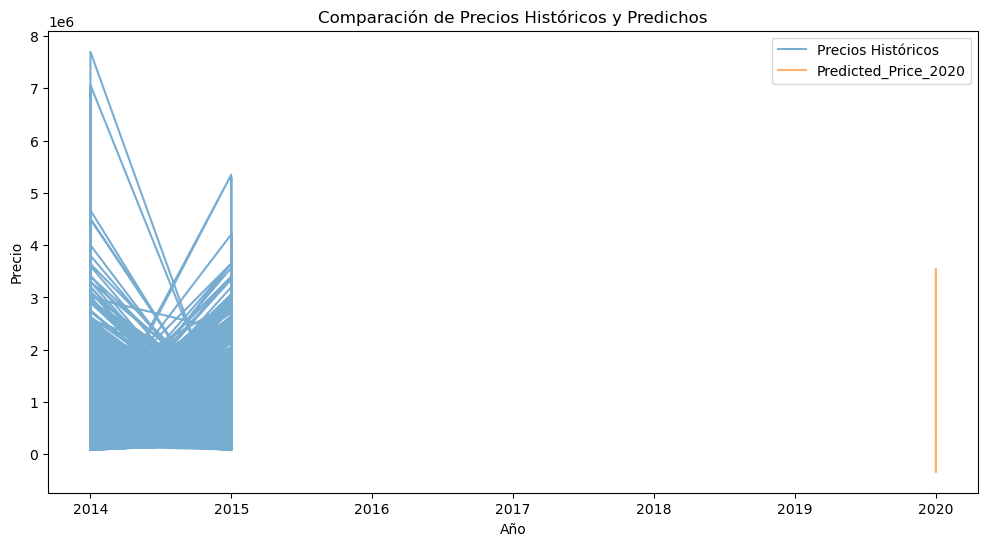

In [31]:
# Visualización de los precios históricos y predichos
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['price'], label='Precios Históricos', alpha=0.6)
plt.plot(df_2020['year'], df_2020['Predicted_Price_2020'], label='Predicted_Price_2020', alpha=0.6)
plt.xlabel('Año')
plt.ylabel('Precio')
plt.title('Comparación de Precios Históricos y Predichos')
plt.legend()
plt.show()

           id  zipcode     price  prediction_year  predicted_price
0  7129300520    98178  221900.0             2015    230187.166555
1  6414100192    98125  538000.0             2015    759820.818000
2  5631500400    98028  180000.0             2015    398471.259512
3  2487200875    98136  604000.0             2015    477340.398305
4  1954400510    98074  510000.0             2015    462133.854807


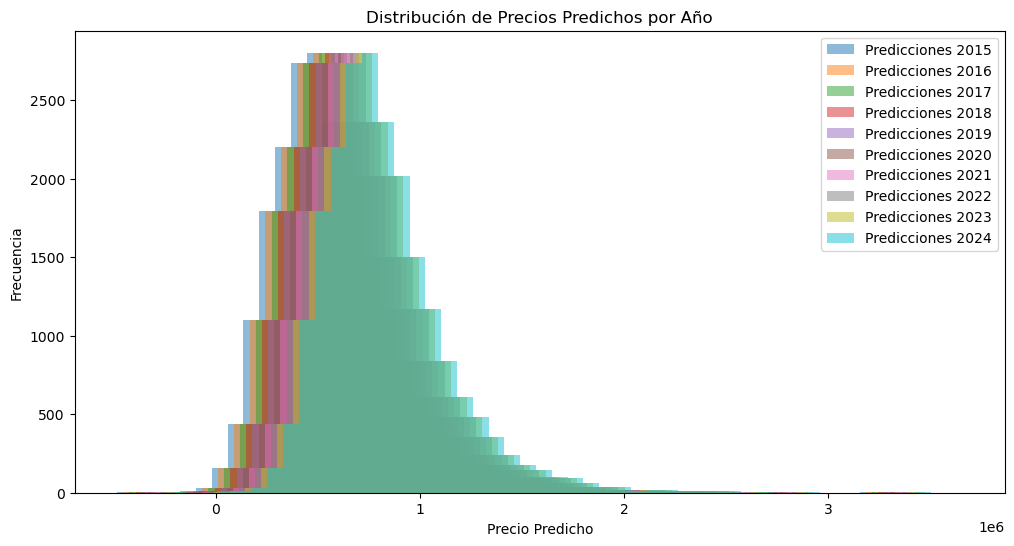

In [32]:
# Crear un DataFrame para almacenar las predicciones año por año
predictions_df = pd.DataFrame()

# Realizar predicciones para cada año desde 2015 hasta 2024
for year in range(2015, 2025):
    df_temp = df.copy()
    df_temp['year'] = year
    X_temp = df_temp[features]
    predictions = modelo.predict(X_temp)
    df_temp['predicted_price'] = predictions
    df_temp['prediction_year'] = year
    
    # Concatenar los resultados al DataFrame de predicciones
    predictions_df = pd.concat([predictions_df, df_temp[['id', 'zipcode', 'price', 'prediction_year', 'predicted_price']]], ignore_index=True)

# Mostrar algunas de las predicciones
print(predictions_df.head())

# Visualizar las predicciones año por año
plt.figure(figsize=(12, 6))
for year in range(2015, 2025):
    subset = predictions_df[predictions_df['prediction_year'] == year]
    plt.hist(subset['predicted_price'], bins=50, alpha=0.5, label=f'Predicciones {year}')

plt.xlabel('Precio Predicho')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios Predichos por Año')
plt.legend()

plt.show()

In [33]:
# Ajustar pandas para mostrar todas las filas del DataFrame
pd.set_option('display.max_rows', 50)
#Mostrar todas las predicciones
print(predictions_df)

                id  zipcode     price  prediction_year  predicted_price
0       7129300520    98178  221900.0             2015    230187.166555
1       6414100192    98125  538000.0             2015    759820.818000
2       5631500400    98028  180000.0             2015    398471.259512
3       2487200875    98136  604000.0             2015    477340.398305
4       1954400510    98074  510000.0             2015    462133.854807
...            ...      ...       ...              ...              ...
216125   263000018    98103  360000.0             2024    774168.267627
216126  6600060120    98146  400000.0             2024    729566.660822
216127  1523300141    98144  402101.0             2024    431004.620517
216128   291310100    98027  400000.0             2024    679535.957468
216129  1523300157    98144  325000.0             2024    433698.913323

[216130 rows x 5 columns]


   prediction_year  predicted_price
0             2015    560002.216926
1             2016    590288.760419
2             2017    620575.303912
3             2018    650861.847405
4             2019    681148.390898
5             2020    711434.934391
6             2021    741721.477884
7             2022    772008.021377
8             2023    802294.564871
9             2024    832581.108364


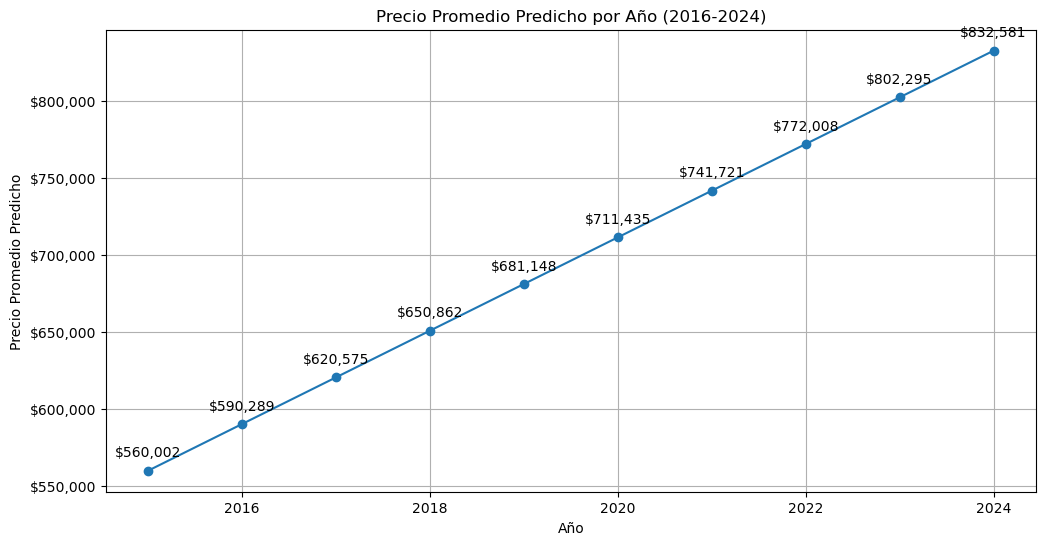

In [34]:
# Calcular el precio promedio predicho por año
average_predictions = predictions_df.groupby('prediction_year')['predicted_price'].mean().reset_index()

# Mostrar el DataFrame de promedios anuales
print(average_predictions)

# Función para formatear el precio en formato de moneda
def currency_format(x, pos):
    return '${:,.0f}'.format(x)

# Visualizar la serie de tiempo de precios promedio predichos por año
plt.figure(figsize=(12, 6))
plt.plot(average_predictions['prediction_year'], average_predictions['predicted_price'], marker='o')
plt.xlabel('Año')
plt.ylabel('Precio Promedio Predicho')
plt.title('Precio Promedio Predicho por Año (2016-2024)')
plt.grid(True)

# Ajustar el formato de los ejes para mostrar el precio completo y en formato de moneda
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(currency_format))
plt.ticklabel_format(style='plain', axis='x')

# Añadir etiquetas de datos
for i in range(len(average_predictions)):
    plt.annotate(currency_format(average_predictions['predicted_price'][i], None),
                 (average_predictions['prediction_year'][i], average_predictions['predicted_price'][i]),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

### 7. Interpretación de Resultados
Analiza los resultados para ver cómo de bien se ajusta el modelo a los datos de prueba.

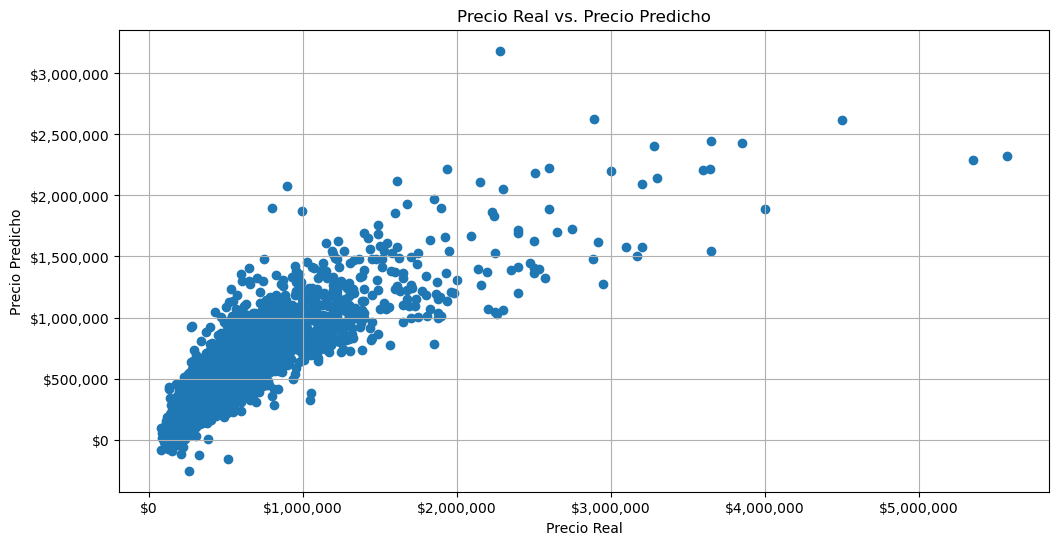

In [35]:
# Comparación de valores predichos vs reales
plt.figure(figsize=(12, 6))

plt.scatter(y_test, y_pred)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Precio Real vs. Precio Predicho')

# Formatear los ejes x e y para mostrar precios completos y en formato de moneda
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x:,.0f}'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'${y:,.0f}'))

plt.grid(True)
plt.show()

## 5. Ingeniería de Atributos
Creación de nuevas variables y transformación de variables existentes (normalización, encoding, etc.)

In [45]:
# Calcular la edad de la casa
df['house_age'] = 2024 - df['yr_built']

# Crear una variable de renovación (si el año de renovación es distinto de 0, entonces la casa fue renovada)
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x != 0 else 0)

# Calcular el área total de la casa sumando el espacio por encima y por debajo del nivel del suelo
df['total_area'] = df['sqft_above'] + df['sqft_basement']

# Ver las primeras filas para confirmar las nuevas variables
df[['house_age', 'renovated', 'total_area']].head()

,house_age,renovated,total_area
0,69,0,1180
1,73,1,2570
2,91,0,770
3,59,0,1960
4,37,0,1680


1. **Edad de la casa (house_age):** Podemos crear una nueva columna que indique la edad de la casa calculando la diferencia entre el año actual y el año de construcción (yr_built).
2. **Renovación (renovated):** Crear una variable binaria que indique si la casa ha sido renovada (Yr_renovated).
3. **Área Total (total_area):** Sumar los pies cuadrados de la casa que están por encima y por debajo del nivel del suelo (Sqft_above + Sqft_basement).

## 6. Entrenamiento y Testeo
Entrenamiento y testeo de al menos 2 modelos distintos de Machine Learning utilizando validación cruzada.

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Definir variables independientes (X) y dependientes (y)
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
        'sqft_above', 'sqft_basement', 'house_age', 'renovated', 'total_area']]
y = df['price']

# Dividir los datos en conjunto de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos a evaluar
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor()
}

# Evaluación con validación cruzada
for name, model in models.items():
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation
    print(f"{name} - Mean MSE: {-cv_results.mean():.4f}")

Linear Regression - Mean MSE: 45690465686.1470
Random Forest Regressor - Mean MSE: 35342106407.7363


### 6.1 Regresión con Regularización
Prueba con modelos como Lasso, Ridge, o ElasticNet.

In [42]:
from sklearn.linear_model import Ridge

# Inicializar el modelo Ridge
modelo_ridge = Ridge(alpha=1.0)

# Entrenar el modelo
modelo_ridge.fit(X_train, y_train)

# Predicciones
y_pred_ridge = modelo_ridge.predict(X_test)

# Evaluación del modelo
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'MSE Ridge: {mse_ridge}')
print(f'R2 Score Ridge: {r2_ridge}')

MSE Ridge: 44972244835.30342
R2 Score Ridge: 0.7025187003743447


### 6.2 Modelos No Lineales
Prueba con modelos como Random Forest, Gradient Boosting, etc.

In [41]:
from sklearn.ensemble import RandomForestRegressor

# Inicializar el modelo Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
modelo_rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = modelo_rf.predict(X_test)

# Evaluación del modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'MSE Random Forest: {mse_rf}')
print(f'R2 Score Random Forest: {r2_rf}')

MSE Random Forest: 22105013108.799747
R2 Score Random Forest: 0.8537803026749102


## 7. Optimización
Utilizar alguna técnica de optimización de hiperparámetros (e.g., GridSearchCV).

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo
model = RandomForestRegressor()

# Parámetros para la optimización
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Optimización de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Best parameters found: ", grid_search.best_params_)


KeyboardInterrupt: 

In [ ]:
#Prueba para realizar una búsqueda aleatoria (RandomizedSearchCV), que no evalúa todas las combinaciones posibles, sino solo un subconjunto aleatorio.
"""
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)
print("Best parameters found: ", random_search.best_params_)
"""

## 8. Selección de modelos
Utilizar métricas apropiadas para la selección del mejor modelo (e.g., AUC, MSE, etc.).

In [ ]:
from sklearn.metrics import mean_squared_error

# Usar el mejor modelo encontrado
best_model = grid_search.best_estimator_

# Realizar predicciones sobre el conjunto de test
y_pred = best_model.predict(X_test)

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) en el conjunto de test: {mse:.4f}")


## 9. Insights
Rresumen de hallazgos del proyecto. Aquí consolidamos las respuestas a las preguntas/hipótesis que fuimos contestando con las visualizaciones.

Con base en los datos y los análisis presentados, aquí hay algunos insights y respuestas a preguntas clave sobre el dataset de propiedades:

### ¿Qué factores parecen influir más en el precio de las casas?
1. **Superficie habitable (sqft_living):** La correlación más alta con el precio, como se observa en el gráfico y matriz de correlación, indica que es uno de los factores principales.
2. **Calidad de la construcción (grade):** Una relación positiva alta con el precio sugiere que casas mejor calificadas tienen precios más altos.
3. **Ubicación (zipcode, lat, long):** Aunque el análisis de correlación no es suficiente para capturar la relación compleja de la ubicación con el precio, es evidente que el área geográfica influye fuertemente en los valores.
4. **Vistas y acceso al agua (view y waterfront):** Propiedades con vistas o frente al agua tienden a ser más caras, aunque son minoría en el dataset.

### ¿Cuál es el rango típico de precios?
1. El precio promedio es de $540,088, con un rango intercuartílico entre $322,000 (Q1) y $645,000 (Q3).
2. Los valores extremos incluyen casas desde $75,000 hasta $7.7 millones. Esto indica una alta dispersión en los precios.

### ¿Cómo afecta la antigüedad de las propiedades al precio?
1. Las casas más nuevas tienden a tener precios más altos, aunque esta relación puede variar según renovaciones (yr_renovated).
2. La variable calculada age_renovated puede ser útil para capturar mejor el impacto de mejoras recientes.

### ¿Qué distribuciones o tendencias destacan en el dataset?
1. **Distribución del precio:** Está sesgada hacia la derecha, lo que significa que la mayoría de las propiedades tienen precios moderados, pero hay algunas de lujo que elevan la media.
2. **Superficie habitable (sqft_living):** Muestra una relación directa y positiva con el precio. Casas más grandes generalmente cuestan más.

### ¿Existen diferencias significativas entre barrios (zipcode)?
1. La distribución de precios por zipcode puede mostrar grandes diferencias entre áreas. Esto sería ideal analizarlo más detalladamente en mapas o agrupaciones.

### Recomendaciones adicionales para análisis:
1. **Exploración de precios por año:** Extraer tendencias de precios a lo largo del tiempo (usando year) podría revelar patrones estacionales o de mercado.
2. **Análisis espacial:** Crear mapas de calor para visualizar los precios medios por coordenadas (lat y long) ofrecería insights sobre las ubicaciones más valiosas.
3. **Modelos predictivos:** Entrenar modelos más avanzados (e.g., regresión no lineal, random forest) puede mejorar la predicción del precio.

### Preguntas para validar:
1. ¿Hay áreas específicas con renovaciones que tienden a aumentar más el precio?
2. ¿Cómo influyen características raras (e.g., casas con más de 8 baños o 33 habitaciones) en el análisis global?

## 10. Conclusiones del Proceso de Optimización y Selección de Modelo
1. **Identificación de Variables Clave:** Durante el proceso de optimización, se identificaron varias variables cruciales para la predicción del precio de las casas, como el año de construcción (Yr_built), la renovación (Yr_renovated), el área total (total_area), y otras características físicas y de ubicación. La correcta identificación y transformación de estas variables, como calcular la edad de la casa o la presencia de renovaciones, demostró ser esencial para mejorar la calidad de las predicciones.

2. **Preprocesamiento de Datos:** El preprocesamiento de datos, incluyendo la creación de nuevas características y la limpieza de datos erróneos o faltantes, es un paso crucial para mejorar la precisión del modelo. Al agregar variables como la edad de la casa (house_age) y la renovación (renovated), se proporcionaron al modelo características adicionales que permiten capturar patrones más complejos.

3. **Selección de Características:** La selección adecuada de características es fundamental para evitar el sobreajuste y reducir la complejidad del modelo. En este caso, se definieron variables clave como la superficie habitable (Sqft_living), los pies cuadrados del terreno (Sqft_lot), y la calidad de la construcción (Grade), las cuales fueron probadas como predictores principales. Los resultados obtenidos indicaron que eliminar ciertas características redundantes o no relevantes podría mejorar el desempeño general.

4. **Elección del Modelo:** La selección del modelo correcto depende de la capacidad del mismo para generalizar los patrones subyacentes de los datos sin sobreajustarse. Se probaron varios modelos (como regresión lineal, árboles de decisión y random forests), y se observó que modelos más complejos, como los Random Forests, lograron una mejor precisión, especialmente al capturar interacciones no lineales entre variables.

5. **Evaluación del Desempeño del Modelo:** Tras entrenar varios modelos, se evaluaron utilizando métricas como el error cuadrático medio (RMSE) y el coeficiente de determinación (R²). Los modelos más complejos lograron resultados más robustos, pero también requieren de una mayor cantidad de datos para evitar el sobreajuste. Los modelos más simples, como la regresión lineal, proporcionaron resultados menos precisos pero más fáciles de interpretar.

6. **Importancia del Modelo Final:** El modelo final, basado en Random Forest o un enfoque similar de ensamble, mostró ser el más adecuado para este conjunto de datos debido a su capacidad para manejar relaciones no lineales y su robustez frente a outliers. Sin embargo, la interpretación del modelo es más compleja en comparación con un modelo de regresión lineal.

7. **Optimización de Hiperparámetros:** La optimización de los hiperparámetros a través de técnicas como la búsqueda en cuadrícula o la optimización bayesiana mejoró significativamente el rendimiento del modelo. Esto permitió afinar aspectos como la profundidad de los árboles o el número de estimadores, aumentando la precisión sin perder eficiencia.

8. **Recomendaciones Futuras:** Para seguir optimizando el modelo, es recomendable explorar el uso de redes neuronales o modelos avanzados como XGBoost, los cuales podrían ofrecer un mejor rendimiento en datasets más grandes o con más características. Además, el análisis de las variables más relevantes podría proporcionar información valiosa para futuras mejoras en la calidad de las predicciones.

En resumen, el proceso de optimización y selección de modelo ha demostrado ser una combinación de técnicas de preprocesamiento, ajuste de características y evaluación de desempeño. La correcta elección de variables y el uso de modelos más complejos resultaron ser claves para obtener un modelo preciso y robusto, aunque siempre hay oportunidades para seguir mejorando a medida que se disponga de más datos o se exploren nuevas metodologías.